Table of Contents
About The Lab
Imports
Tasks
Task 1: Load and Explore the Dataset
Task 2: Preprocess the Data
Task 3: Feature Scaling - Data Standardization
Task 4: Split the Dataset
Understanding Accuracy and Confusion Matrix
Task 5: Apply K-Nearest Neighbors (KNN) Classifier
Task 6: Apply Support Vector Machine (SVM) Classifier
Task 7: Compare the Performance of Different Classifiers and General Reflection

About The Lab
In this lab, you will gain hands-on experience with several key concepts and techniques in machine learning:

K-Nearest Neighbors (KNN): Implement and understand the KNN algorithm for classification tasks.
Support Vector Machines (SVM): Explore SVMs with different kernels and understand their impact on classification.
Data standardization: Understand the importance of feature scaling and standardization for certain algorithms.
Evaluation Metrics: Learn about Accuracy and Confusion Matrix to evaluate classification models

In [28]:
#Import modules
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



Task 1: Load and Explore the Datset
The Wine Quality dataset (UCI Machine Learning Repository) contains information about red and white variants of the Portuguese "Vinho Verde" wine.

Instructions:

1. Load the dataset into a pandas DataFrame. You can use either the red wine or white wine dataset, or combine them if you wish.

2. Display the first few rows of the dataset.

3. Get a summary of the dataset, including data types and descriptive statistics.

In [29]:
#1. Load the dataset into pandas DataFrame. 

df = pd.read_csv('./data/winequality-red.csv', delimiter=';')

# 2. Display the few rows
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [30]:
# 3. Get a summary of the dataset, including data types and descriptive statistics.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [31]:
#description
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Task 2: Preprocess the Data
Before we can apply machine learning algorithms, we need to preprocess the data.

Instructions:

1. Explore the 'quality' column and consider converting it into a binary classification problem (e.g., wine is 'good' if quality >= 7, otherwise 'not good').
2. Plot the distribution of the new target variable.

In [32]:
# 1. Explore the quality column, convert the column into binary classes

df['quality_binary'] = np.where(df['quality'] >= 7, 1, 0)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_binary
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


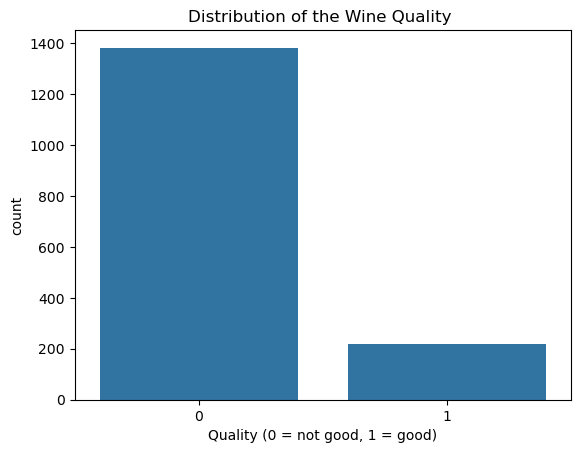

In [33]:
#Plot the distribution of the new target variable, you can use the sns count plot from seaborn lib.

sns.countplot(x='quality_binary', data=df) 
plt.title('Distribution of the Wine Quality ')
plt.xlabel('Quality (0 = not good, 1 = good)')
plt.ylabel('count')
plt.show()

Task 3: Feature Scaling - Data Standardization
Feature scaling ensures that each feature contributes equally to the result, preventing features with larger scales from dominating the learning process. Standardization transforms features to have a mean of 0 and a standard deviation of 1, which is crucial for algorithms like KNN and SVM.

(For a deeper understanding of feature scaling and its importance in machine learning, you can refer to this GeeksforGeeks article on feature scaling: normalization vs standardization.)

Instructions:

1.Separate the features and the target variable.
2.Use StandardScaler to standardize the feature data. (We imported the class from the sklearn.preprocessing module)


In [34]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [35]:
#separate the features and the target
X=df.drop(['quality', 'quality_binary'], axis = 1)
y = df['quality_binary']

#Before scaling
X.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [36]:
#2. Use the standardscaler to standardize the features of the data
#Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[-0.52835961  0.96187667 -1.39147228 ...  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ... -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.70550789  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.77526673 ...  1.6773996   0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  1.02199944 ...  0.51112954  0.01092425
   0.54162988]]


In [37]:
#3. compare the data before before and after scaling
X_scaled_df= pd.DataFrame(X_scaled, columns = X.columns)
#This above line creates a Pandas DataFrame, input is X_scaled, X.column names from the original X DataFrmae to the new X_scaled_df
print("Before Scaling:`n", X['pH'].head(5))
print("After Scaling:\n", X_scaled_df['pH'].head(5))

Before Scaling:`n 0    3.51
1    3.20
2    3.26
3    3.16
4    3.51
Name: pH, dtype: float64
After Scaling:
 0    1.288643
1   -0.719933
2   -0.331177
3   -0.979104
4    1.288643
Name: pH, dtype: float64


Task 4: Split the Dataset
We need to split the dataset into training and testing sets to evaluate our models.

Instructions:

1.Use train_test_split to split the data into training and testing sets (e.g., 70% training, 30% testing).

2.Set a random state for reproducibility.

In [38]:
#1. split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state = 42)

Task 5: Apply K-Nearest Neighbors (KNN) Classifier
Now, let's build and evaluate a KNN classifier.

Instructions:

1.Initialize a KNN classifier.
2.Use cross-validation to find the optimal value of K (number of neighbors).
3.Train the model with the optimal K.
4.Make predictions on the test set.
5.Evaluate the model using accuracy score and confusion matrix.

In [39]:
from sklearn.neighbors import KNeighborsClassifier
#1. Initialize KNN classifier
knn = KNeighborsClassifier()

In [40]:
#2. To use cross-validation to find the optimal value of K. use GridSearchCV from sklearn.model_selection module. 
# Define the parameter grid with different values of K and fit the grid search to the training data.
from sklearn.model_selection import GridSearchCV
# Define parameter grid
param_grid = {'n_neighbors' : np.arange(1,31)}

#Use GridSearchCV to find the optimal K
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
knn_gscv.fit(X_train, y_train)

#Get the optimal K
optimal_k = knn_gscv.best_params_['n_neighbors']
print(f"Optimal K: {optimal_k}")


Optimal K: 4


In [41]:
#3. to train the model with the optimal K
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [42]:
#4. make predictions on the test set, use the predict method of the trained model. 
y_pred = knn_optimal.predict(X_test)

In [43]:
# 5. Evaluate the model using accuracy and the confusion matrix
# evaluate the model

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
cm=confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix: {cm}")

Accuracy: 0.88125
Confusion Matrix: [[398  15]
 [ 42  25]]


Task 6: Apply Support Vector Machine (SVM) Classifier
Let's apply SVM with different kernels and evaluate the performance.

Instructions:

1.Initialize SVM classifiers with different kernels ('linear', 'rbf').
2.Train the models on the training data.
3.Make predictions on the test set.
4.Evaluate the models using accuracy score and confusion matrix.

In [44]:
# 1. Initialize SVM classifiers with different kernel (linear, 'rbf')
from sklearn.svm import SVC
svm_linear = SVC(kernel = 'linear')
svm_rbf = SVC(kernel = 'rbf')

In [45]:
#2. train the models
svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

SVC()

In [46]:
# 3.make predictions on the test set
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

In [47]:
# 4. evaluate the model using accuracy score and confusion matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
accuracy_linear = accuracy_score(y_test, y_pred_linear)
cm_linear = confusion_matrix(y_test, y_pred_linear)

accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
cm_rbf = confusion_matrix(y_test, y_pred_rbf)

print(f"Linear Kernel - Accuracy : {accuracy_linear}")
print(f"Linear Kernel - confusion matrix : {cm_linear}")

print(f"RBF Kernel - Accuracy : {accuracy_rbf}")
print(f"RBF Kernel - Confusion matrix : {cm_rbf}")

Linear Kernel - Accuracy : 0.8604166666666667
Linear Kernel - confusion matrix : [[413   0]
 [ 67   0]]
RBF Kernel - Accuracy : 0.8833333333333333
RBF Kernel - Confusion matrix : [[403  10]
 [ 46  21]]


Task 7: Compare the Performance of Different Classifiers and General Reflection
Let's compare the performance of the KNN and SVM classifiers that we have trained.

Instructions:
Create a summary table of the accuracy scores of each classifier.
# Summary table of accuracy scores
summary = {
  'Classifier': ['KNN', 'SVM (Linear Kernel)', 'SVM (RBF Kernel)'],
  'Accuracy': [accuracy, accuracy_linear, accuracy_rbf]
}
summary_df = pd.DataFrame(summary)
print(summary_df)

2. Plot ROC curves for each classifier (optional)
Reflection
1. Which classifier performed the best based on accuracy?

2. Considering both accuracy and confusion matrices, which model would you choose and why?

3. Could you use the models trained on red wine to predict the quality if the different white wines?

4. Reflect on how you might apply the techniques learned in this lab to other datasets and machine learning problems.

In [48]:
#1. create a summary table of the accuracy score of each classifier
#Summary table of accuracy scores. 
summary = {
    'Classifier': ['KNN', 'SVM(Linear Kernel)', 'SVM(RBF Kernel)'],
    'Accuracy':[accuracy, accuracy_linear, accuracy_rbf]
}
summary_df = pd.DataFrame(summary)
print(summary_df)

           Classifier  Accuracy
0                 KNN  0.881250
1  SVM(Linear Kernel)  0.860417
2     SVM(RBF Kernel)  0.883333


TypeError: 'function' object is not subscriptable

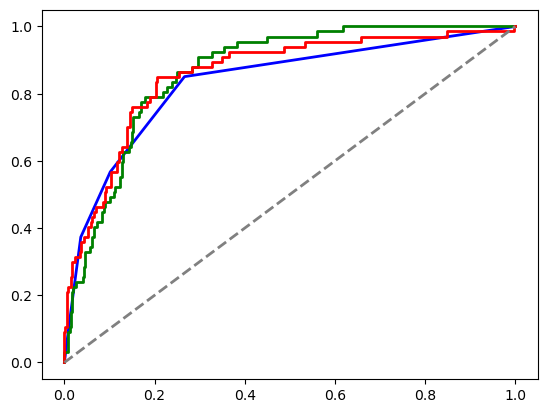

In [51]:
#2 .Plot ROC curves for each classifier
from sklearn.metrics import roc_curve, auc
#compute ROC curve and ROC area for each classifier
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_optimal.predict_proba(X_test)[:,1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_svm_linear, tpr_svm_linear, _ = roc_curve(y_test, svm_linear.decision_function(X_test))
roc_auc_svm_linear = auc(fpr_svm_linear, tpr_svm_linear)

fpr_svm_rbf, tpr_svm_rbf, _ = roc_curve(y_test, svm_rbf.decision_function(X_test))
roc_auc_svm_rbf = auc(fpr_svm_rbf, tpr_svm_rbf)

#Plot ROC curves
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label='KNN (area = %0.2f)' % roc_auc_knn)
plt.plot(fpr_svm_linear, tpr_svm_linear, color='green', lw=2, label='SVM Linear  (area = %0.2f)' % roc_auc_svm_linear)
plt.plot(fpr_svm_rbf, tpr_svm_rbf, color='red', lw=2, label='SVM RBF (area = %0.2f)' % roc_auc_svm_rbf)
plt.plot([0,1],[0,1], color='grey', lw=2, linestyle='--')
plt.xlim[0.0, 1.0]
plt.ylim[0.0, 1.05]
plt.xlabel('False Positive rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()